In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("nba_season_2014_data.csv")
df.drop(df[(df['GAME_PLAYED_x'] == 1) | (df['GAME_PLAYED_y'] == 1 )].index, inplace=True)

// Filtering out the necessary columns to perform corrlinearity check

In [13]:
df_filtered = df[['PLUS_MINUS_x', 'HOME_COURT_x', 'DIS_PTS_x', 'DIS_AST_x', 'DIS_OREB_x', 'DIS_DREB_x', 'DIS_ELO_x', 'DIS_OFFRATE_x', 'DIS_DEFRATE_y']]
df_filtered.head()

,PLUS_MINUS_x,HOME_COURT_x,DIS_PTS_x,DIS_AST_x,DIS_OREB_x,DIS_DREB_x,DIS_ELO_x,DIS_OFFRATE_x,DIS_DEFRATE_y
16,-6.0,0,79.0,15.0,8.0,37.0,0.000000,-0.216928,0.155831
17,-18.0,0,93.0,16.0,13.0,21.0,0.287744,-0.095509,-1.248297
18,7.0,0,95.0,20.0,7.0,29.0,0.000000,0.147287,-0.098207
20,9.0,1,77.0,13.0,15.0,35.0,-20.000000,-0.394669,0.036722
21,-5.0,0,101.0,23.0,9.0,29.0,0.287744,-0.107663,0.862205


// Check for bivariate correlation

In [14]:
df_filtered.corr()

,PLUS_MINUS_x,HOME_COURT_x,DIS_PTS_x,DIS_AST_x,DIS_OREB_x,DIS_DREB_x,DIS_ELO_x,DIS_OFFRATE_x,DIS_DEFRATE_y
PLUS_MINUS_x,1.000000,0.175401,0.116182,0.160844,-0.107613,0.080262,0.390370,0.306431,-0.016244
HOME_COURT_x,0.175401,1.000000,-0.032705,-0.032018,-0.015363,-0.051539,-0.010288,-0.005232,0.087493
DIS_PTS_x,0.116182,-0.032705,1.000000,0.754543,0.447914,0.723938,0.318128,0.317595,-0.001891
DIS_AST_x,0.160844,-0.032018,0.754543,1.000000,0.134281,0.567919,0.400651,0.257244,-0.046744
DIS_OREB_x,-0.107613,-0.015363,0.447914,0.134281,1.000000,0.433103,-0.199938,-0.236704,0.047761
DIS_DREB_x,0.080262,-0.051539,0.723938,0.567919,0.433103,1.000000,0.216877,-0.093857,0.045231
DIS_ELO_x,0.390370,-0.010288,0.318128,0.400651,-0.199938,0.216877,1.000000,0.637548,-0.025832
DIS_OFFRATE_x,0.306431,-0.005232,0.317595,0.257244,-0.236704,-0.093857,0.637548,1.000000,-0.034097
DIS_DEFRATE_y,-0.016244,0.087493,-0.001891,-0.046744,0.047761,0.045231,-0.025832,-0.034097,1.000000


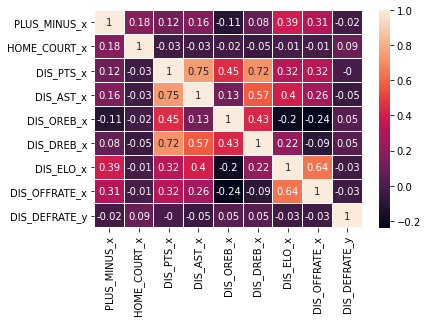

In [15]:
corr = df_filtered.corr()
sns.heatmap(round(corr, 2), 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True,
            linewidths=.05)
plt.show()

// Perform Variance Inflation Factor multi-collinearity check

- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
link: 
- https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

- https://www.theanalysisfactor.com/eight-ways-to-detect-multicollinearity/

- https://www.edupristine.com/blog/detecting-multicollinearity


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [17]:
calc_vif(df_filtered)

,variables,VIF
0,PLUS_MINUS_x,1.223544
1,HOME_COURT_x,1.030931
2,DIS_PTS_x,6.352257
3,DIS_AST_x,2.917343
4,DIS_OREB_x,1.840430
5,DIS_DREB_x,3.364777
6,DIS_ELO_x,2.359871
7,DIS_OFFRATE_x,3.057011
8,DIS_DEFRATE_y,1.011448
